In [64]:
using LinearAlgebra
using FFTW
using Plots
plotlyjs()

Plots.PlotlyJSBackend()

In [66]:
# const domain = [2*pi, pi, 2]
# const dims = [128, 16, 128]
const Pr = 0.71
const nu = 1/180/Pr
const dt = 1e-4


const Nx = 400
const Nz = 129
const Ntheta = 129



const kx = 1
const ky = 0

0

In [67]:
x = LinRange(-pi, pi, Nx+1)[1:end-1]
z = LinRange(-1, 1, Nz)

const dx = x[2] - x[1]
const dz = z[2] - z[1]

xx = x .+ z'.*0
zz = x .* 0 .+ z'

u = 1 .- zz.^2
v = zz .* 0
w = zz .* 0;

In [68]:
function solver(u, v, w, T)
    adv = zeros(Float64, (Nx, Nz))
    adv[:, 2:end-1] .= u[:, 2:end-1] .* (circshift(T[:, 2:end-1],[-1, 0]) .- circshift(T[:, 2:end-1],[1, 0]))./dx./2

    diff = zeros(Float64, (Nx, Nz))
    diff[:, 2:end-1] .= nu .*( circshift(T[:, 2:end-1],[-1,0]) .- 2 .*T[:, 2:end-1] .+ circshift(T[:, 2:end-1],[1,0]))./dx./dx .+ 
    nu .*(T[:, 3:end] .- 2 .*T[:, 2:end-1] .+ T[:, 1:end-2] ) ./dz./dz

    T_out = zeros(Float64, (Nx, Nz))
    T_out .= T .- dt .* adv .+ dt .* diff

    return T_out
end

solver (generic function with 1 method)

In [69]:
A = Array{ComplexF64, 2}(undef, Nz-2, Nz-2)
B = Array{ComplexF64, 2}(undef, Nz-2, Nz-2)

for k in range(2, Nz-1)
    T = zeros(Float64, (Nx, Nz))
    T_out = zeros(Float64, (Nx, Nz))

    T[:, k] .=  sin.(kx .* x)

    # input = [fft(T[:, k], 1)[kx+1] for k in range(1, Nz)]
    A[:, k-1] .= fft(T[:, 2:end-1], 1)[kx+1, :]


    T_out .= solver(u, v, w, T)

    # output = [fft(RHS[:, k], 1)[kx+1] for k in range(1, Nz)]
    B[:, k-1] .= fft(T_out[:, 2:end-1], 1)[kx+1, :]
end

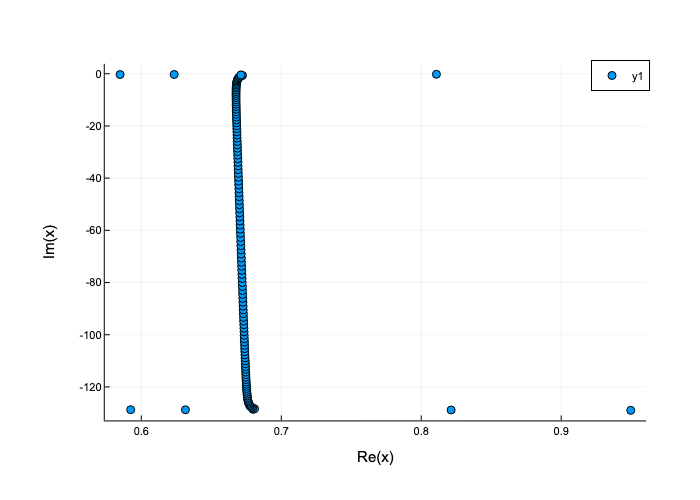

In [70]:
F = eigen(B,A)
omega = 1im.*log.(F.values)./dt
scatter(omega)

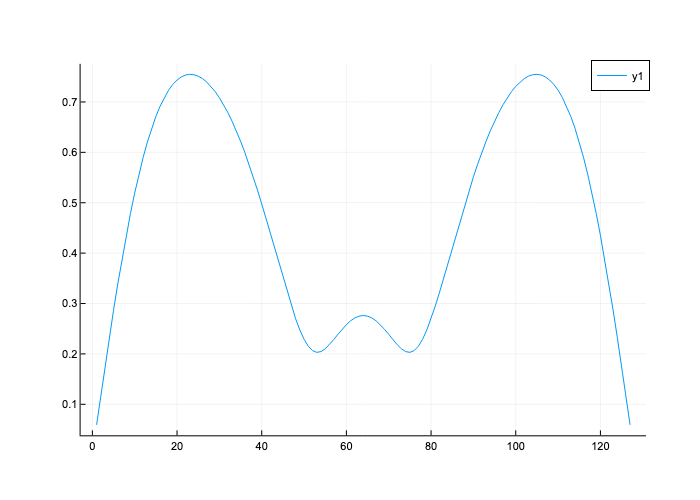

In [71]:
plot(abs.(F.vectors[:, 3]))